ANALYSIS :

    1: Maximum driver count is seen in the Urban city type as compared to that of the Rural city type which clearly shows that
        the Urban city people make use of maximum rides hence more demand of drivers.
    2. The average fare is also high in the Urabn city type as compared to that of the Rural city type which suggest that, since
       urban cities have more demand hence more rides which raise the fare average .
    3. Suburban city are always in between the urban and rural in driver count, average fare and also number of rides.

In [18]:
%matplotlib notebook

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

In [21]:
# Read the City Data
city_data = pd.read_csv(city_data)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [22]:
# Read the Ride Data
ride_data = pd.read_csv(ride_data) 
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [23]:
# Combine the data into a single dataset
city_ride_data = pd.merge(city_data, ride_data, on = "city", how = "outer")
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [24]:
# Average fare per city
ave_fare= city_ride_data.groupby(["city"]).mean()["fare"].rename("Average Fare")
ave_fare=pd.DataFrame(ave_fare)
ave_fare.reset_index(level=0,inplace=True)
ave_fare.head()

,city,Average Fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000


In [25]:
#Total number of rides per city
Total_ride = city_ride_data.groupby(["city"]).count()["ride_id"].rename("Total Rides")
Total_ride = pd.DataFrame(Total_ride)
Total_ride.reset_index(level=0,inplace=True)
Total_ride.head() 

,city,Total Rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [26]:
# Total Number of Drivers Per City
Total_drivers = city_ride_data.groupby(["city"]).count()["fare"].rename("Total Drivers")
Total_drivers = pd.DataFrame(Total_drivers)
Total_drivers.reset_index(level=0,inplace=True)
Total_drivers.head()

,city,Total Drivers
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [27]:
#create new dataframe with needed information for fare % by region

Region_type = city_ride_data.groupby(["type"])["driver_count","fare","ride_id"].sum()
Region_type = pd.DataFrame(Region_type)
Region_type.reset_index(level=0,inplace=True)
Region_type.head()

,type,driver_count,fare,ride_id
0,Rural,537,4327.93,580968240341287
1,Suburban,8570,19356.33,3106884522576766
2,Urban,59602,39854.38,7919412664056093


In [28]:
## Bubble Plot of Ride Sharing Data
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

urban_city=city_ride_data[city_ride_data["type"]=="Urban"]
suburban_city=city_ride_data[city_ride_data["type"]=="Suburban"]
rural_city=city_ride_data[city_ride_data["type"]=="Rural"]

In [29]:
urban_ride_count=urban_city.groupby(["city"]).count()["ride_id"]
urban_fare_ave=urban_city.groupby(["city"]).mean()["fare"]
urban_driver_count=urban_city.groupby(["city"]).mean()["driver_count"]

suburban_ride_count=suburban_city.groupby(["city"]).count()["ride_id"]
suburban_fare_ave=suburban_city.groupby(["city"]).mean()["fare"]
suburban_driver_count=suburban_city.groupby(["city"]).mean()["driver_count"]

rural_ride_count=rural_city.groupby(["city"]).count()["ride_id"]
rural_fare_ave=rural_city.groupby(["city"]).mean()["fare"]
rural_driver_count=rural_city.groupby(["city"]).mean()["driver_count"]

<IPython.core.display.Javascript object>


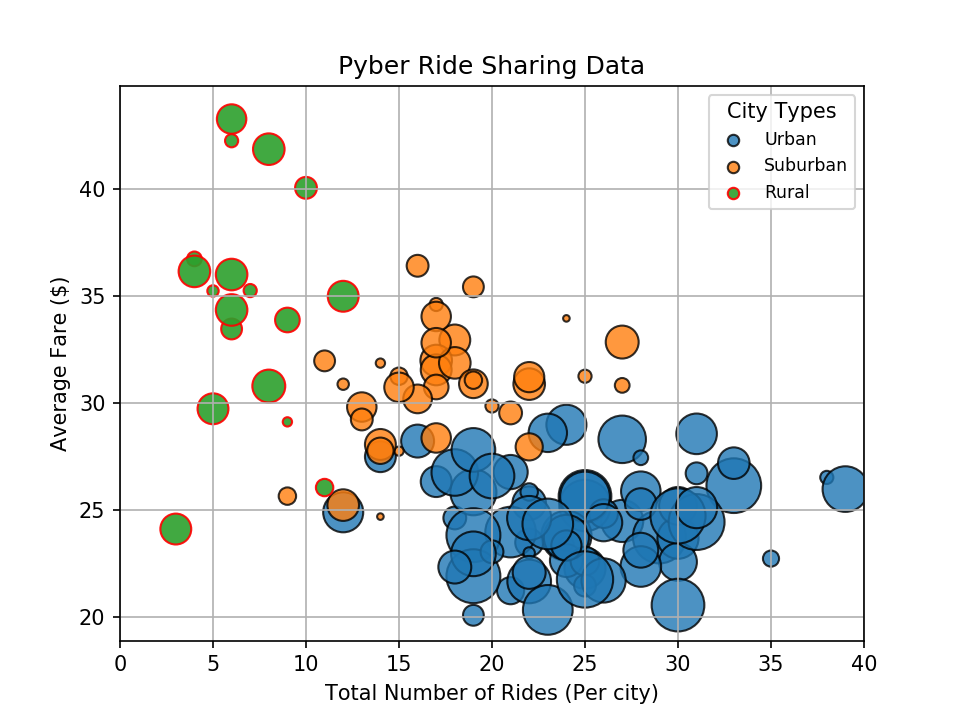

In [35]:
plt.scatter(urban_ride_count,urban_fare_ave, 
            s=10*urban_driver_count,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_fare_ave, 
            s=10*suburban_driver_count,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_fare_ave, 
            s=10*suburban_driver_count,
            edgecolor="r", linewidths=1, marker="o",
            alpha=0.9, label="Rural")

plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per city)")
plt.xlim((0,40))
plt.grid(True)


lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.savefig("Analysis/Bubblespot.png")

plt.show()

In [31]:
#Percentage calculations of Fare,Ride and Driver.

total_percentage = city_ride_data.groupby('type')
fare_percentage = total_percentage['fare'].sum()/city_ride_data['fare'].sum()*100
ride_percentage = total_percentage['fare'].count()/city_ride_data['fare'].count()*100
driver_percentage = total_percentage['driver_count'].sum()/city_ride_data['driver_count'].sum()*100
total_percentage = pd.DataFrame({"Fare %":fare_percentage,"Ride %":ride_percentage,"Driver %":driver_percentage}).reset_index()
total_percentage = total_percentage.rename(columns={"type":"City Type"})
total_percentage

,City Type,Fare %,Ride %,Driver %
0,Rural,6.811493,5.263158,0.781557
1,Suburban,30.463872,26.315789,12.472893
2,Urban,62.724635,68.421053,86.745550


## Total Fares by City Type

<IPython.core.display.Javascript object>


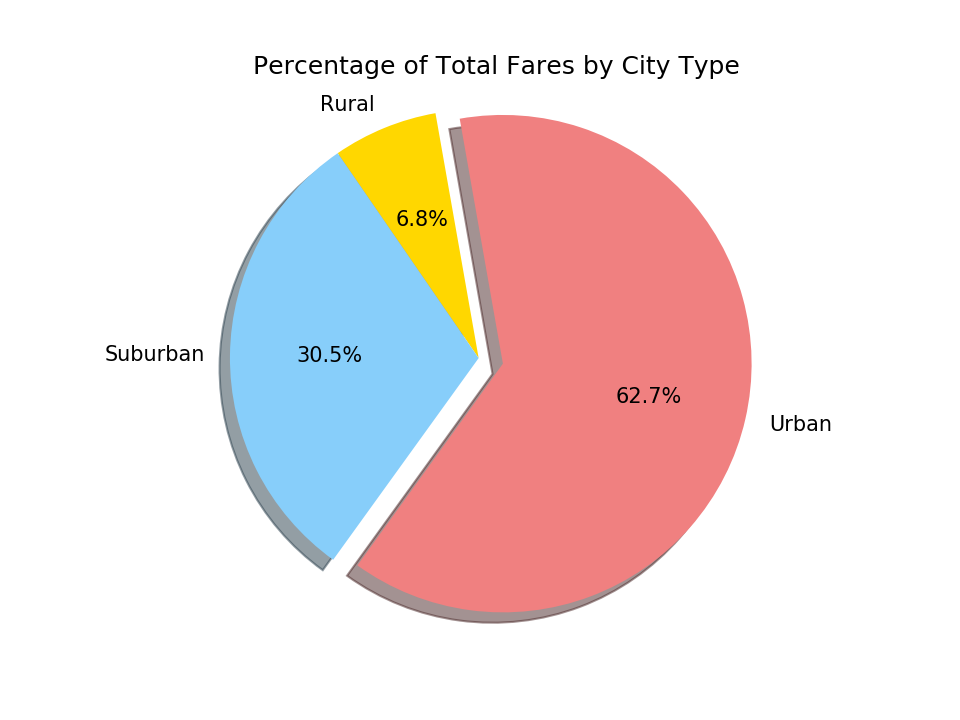

In [36]:
# Build Pie Chart

#Labels to use for the pie chart
labels = total_percentage["City Type"]
sizes = total_percentage["Fare %"]
#Explode value to use for all three pie charts 
explode = (0, 0, 0.1)
#Changes the default colors because I defined my lists in a different order than the example provided
colors = ['gold', 'lightskyblue', 'lightcoral']

#Create first pie chart subject to constraints created above

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.title(" Percentage of Total Fares by City Type")
plt.axis("equal")

plt.savefig("Analysis/Total_Fares_Citytype.png")
plt.show()

## Total Rides by City Type

<IPython.core.display.Javascript object>


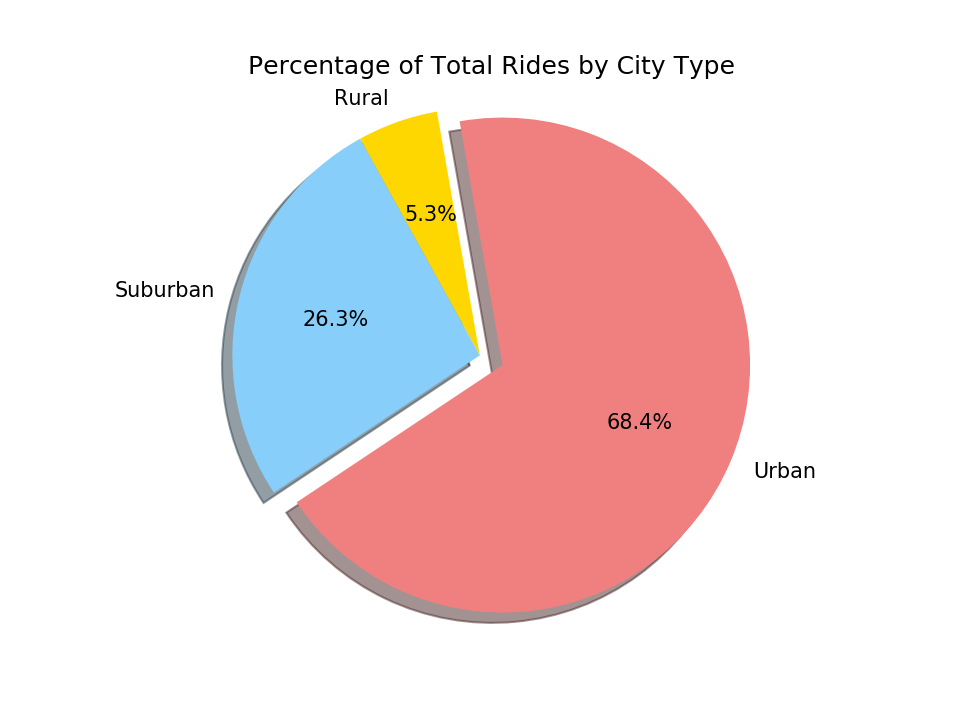

In [37]:
#Build pie charts.

#Labels to use for the pie chart
labels = total_percentage["City Type"]
sizes = total_percentage["Ride %"]
#Explode value to use for all three pie charts 
explode = (0, 0, 0.1)
#Changes the default colors because I defined my lists in a different order than the example provided
colors = ['gold', 'lightskyblue', 'lightcoral']


#Create first pie chart subject to constraints created above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Percentage of Total Rides by City Type")
plt.axis("equal")


plt.savefig("Analysis/Percentage_Total_Rides_Citytype.png")
plt.show()

## Total Drivers by City Type

<IPython.core.display.Javascript object>


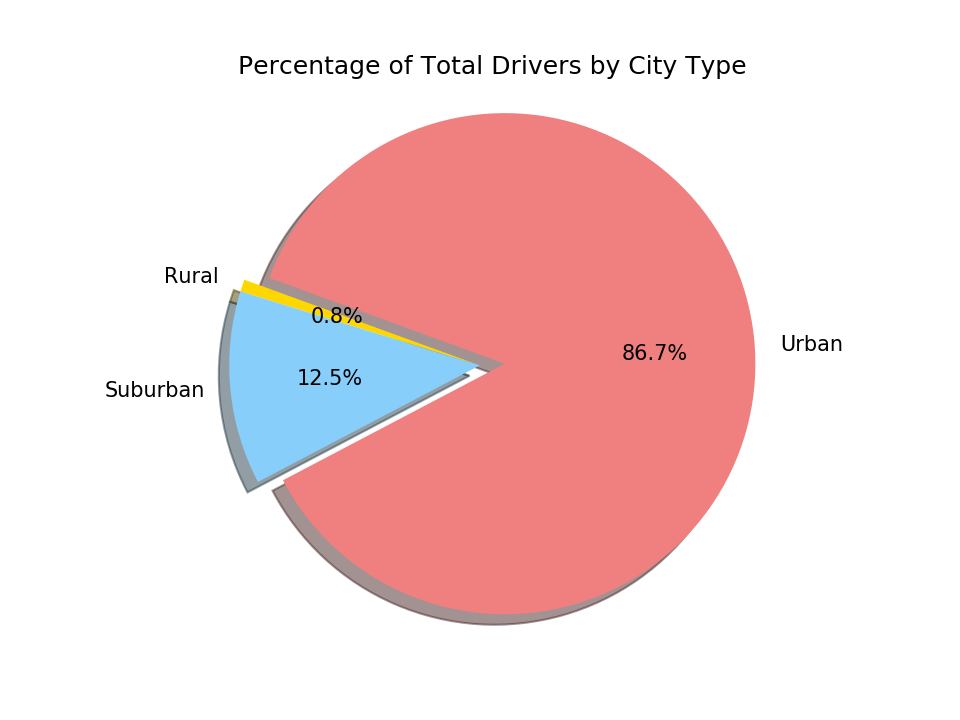

In [38]:
# Build Pie Chart

#Labels to use for the pie chart
labels = total_percentage["City Type"]
sizes = total_percentage["Driver %"]
#Explode value to use for all three pie charts 
explode = (0, 0, 0.1)
#Changes the default colors because I defined my lists in a different order than the example provided
colors = ['gold', 'lightskyblue', 'lightcoral']

#Create first pie chart subject to constraints created above

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("Percentage of Total Drivers by City Type")
plt.axis("equal")

plt.savefig("Analysis/Percentage_Total_Drivers_Citytype.png")
plt.show()